<a href="https://colab.research.google.com/github/Geekomaniac1009/MNIST-digit-classification/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Importing Required Libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# 2. Loading the MNIST Dataset

# Load the MNIST dataset from TensorFlow
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Display the shape of the dataset to check the data dimensions
print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


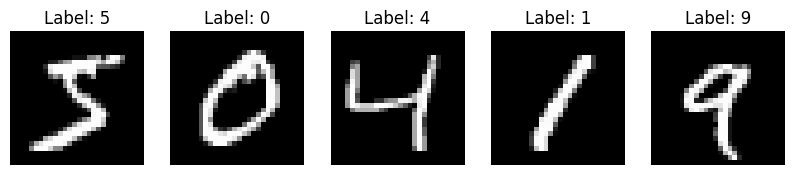

In [ ]:
# 3. Visualizing the Dataset

# Display a few sample images from the training set
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

In [ ]:
# 4. Preprocessing the Data

# Flatten the images from 28x28 to 784-dimensional vectors
train_images_flat = train_images.reshape((train_images.shape[0], 28 * 28))
test_images_flat = test_images.reshape((test_images.shape[0], 28 * 28))

# Compute mean and standard deviation for each pixel across all training images
mean = np.mean(train_images_flat, axis=0)
std = np.std(train_images_flat, axis=0)

# Avoid division by zero (if any pixel has zero standard deviation)
std[std == 0] = 1

# Standardize the images
train_images_scaled = (train_images_flat - mean) / std
test_images_scaled = (test_images_flat - mean) / std

In [ ]:
# 5. Training the Logistic Regression Model

class LogisticRegression:
    def __init__(self, learning_rate=0.01, max_iter=10000, batch_size=64):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.batch_size = batch_size  # For mini-batch gradient descent
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y, y_pred):
        m = len(y)
        return (-1 / m) * np.sum(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))  # Added small value to prevent log(0)

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.random.randn(n) * 0.01  # Small random initialization
        self.bias = 0

        for i in range(self.max_iter):
            indices = np.random.choice(m, self.batch_size, replace=False)  # Random batch selection
            X_batch = X[indices]
            y_batch = y[indices]

            # Compute predictions
            linear_model = np.dot(X_batch, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / self.batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
            db = (1 / self.batch_size) * np.sum(y_pred - y_batch)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Print loss every 1000 iterations
            if i % 1000 == 0:
                loss = self.compute_loss(y_batch, y_pred)
                print(f"Iteration {i}, Loss: {loss:.4f}")

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return (y_pred >= 0.5).astype(int)  # Convert probabilities to class labels

# Multi-Class Classification (One-vs-All)
def multiclass_logistic_regression(X, y, num_classes, learning_rate=0.01, max_iter=10000, batch_size=64):
    models = []
    for i in range(num_classes):
        print(f"Training class {i} vs all...")
        binary_y = (y == i).astype(int)  # Convert to binary labels
        model = LogisticRegression(learning_rate, max_iter, batch_size)
        model.fit(X, binary_y)
        models.append(model)
    return models

def predict_multiclass(X, models):
    predictions = np.array([model.sigmoid(np.dot(X, model.weights) + model.bias) for model in models])
    return np.argmax(predictions, axis=0)  # Pick the class with highest probability

# Train multi-class logistic regression
num_classes = len(np.unique(train_labels))
models = multiclass_logistic_regression(train_images_scaled, train_labels, num_classes)

# Predict on test set
predictions = predict_multiclass(test_images_scaled, models)

# Compute accuracy
accuracy = np.mean(predictions == test_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Training class 0 vs all...
Iteration 0, Loss: 0.7530
Iteration 1000, Loss: 0.1297
Iteration 2000, Loss: 0.1057
Iteration 3000, Loss: 0.0618
Iteration 4000, Loss: 0.0750
Iteration 5000, Loss: 0.0378
Iteration 6000, Loss: 0.1206
Iteration 7000, Loss: 0.0463
Iteration 8000, Loss: 0.0182
Iteration 9000, Loss: 0.0227
Training class 1 vs all...
Iteration 0, Loss: 0.7379
Iteration 1000, Loss: 0.1624
Iteration 2000, Loss: 0.1107
Iteration 3000, Loss: 0.0889
Iteration 4000, Loss: 0.0619
Iteration 5000, Loss: 0.0336
Iteration 6000, Loss: 0.0615
Iteration 7000, Loss: 0.0387
Iteration 8000, Loss: 0.0337
Iteration 9000, Loss: 0.0497
Training class 2 vs all...
Iteration 0, Loss: 0.7060
Iteration 1000, Loss: 0.1922
Iteration 2000, Loss: 0.1448
Iteration 3000, Loss: 0.0893
Iteration 4000, Loss: 0.1583
Iteration 5000, Loss: 0.0418
Iteration 6000, Loss: 0.1283
Iteration 7000, Loss: 0.0983
Iteration 8000, Loss: 0.0498
Iteration 9000, Loss: 0.0741
Training class 3 vs all...
Iteration 0, Loss: 0.6541
Itera

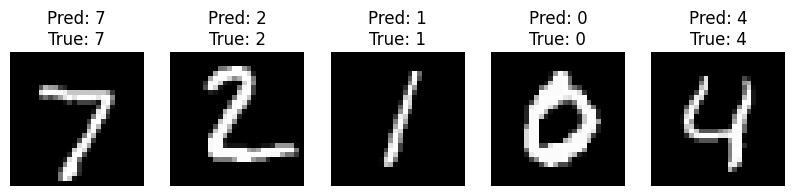

In [ ]:
# 6. Visualizing Predictions

# Display a few test images with their predicted and true labels
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Pred: {predictions[i]}\nTrue: {test_labels[i]}")
    plt.axis('off')
plt.show()


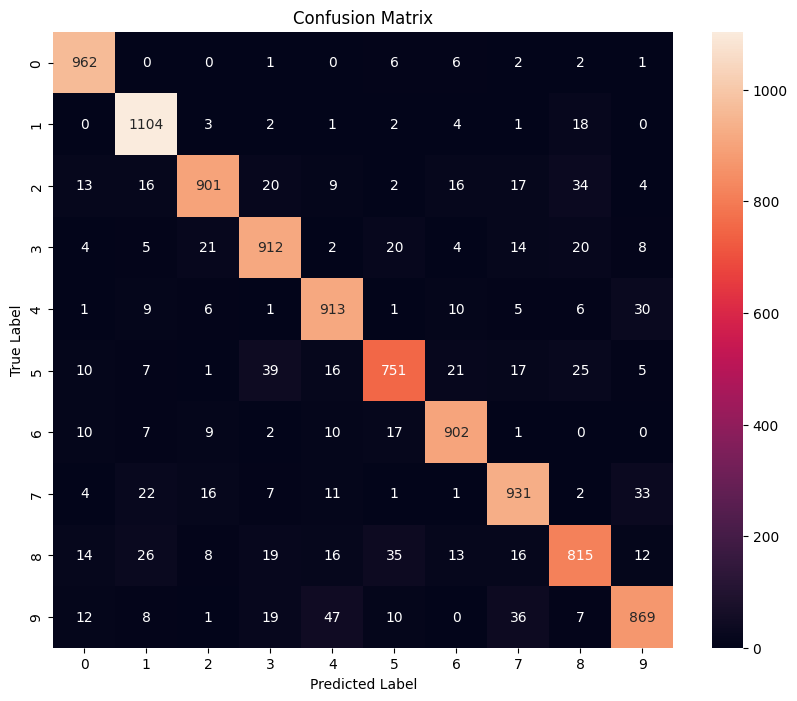

In [ ]:
cm = confusion_matrix(test_labels, predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()